In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


file = 'heart.csv'
file_read = pd.read_csv( file )
file_data = pd.DataFrame( file_read )
file_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
x = file_data.iloc[:,:13]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
pca = PCA( n_components=0.95 )
x_proj = pca.fit_transform( x )
x_proj = pd.DataFrame( x_proj )
x_proj

,0,1,2
0,-12.267345,2.873838,14.969879
1,2.690137,-39.871374,0.877882
2,-42.950214,-23.636820,1.759446
3,-10.944756,-28.438036,-7.044180
4,106.979053,-15.874468,-14.861575
...,...,...,...
298,-4.554121,27.490169,5.374493
299,16.428008,12.921716,-25.582794
300,-51.963811,13.323798,15.486844
301,-114.755981,36.435184,0.127771


In [13]:
print( pca.explained_variance_ratio_ )

[0.7475642  0.15037022 0.08459685]


In [14]:
x_proj.columns = [ 'PC1', 'PC2', 'PC3' ]

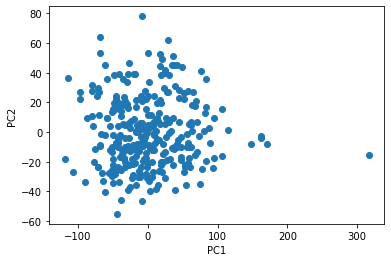

In [15]:
# plot PC1 vs PC2
plt.scatter( x_proj.iloc[:,0], x_proj.iloc[:,1] )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

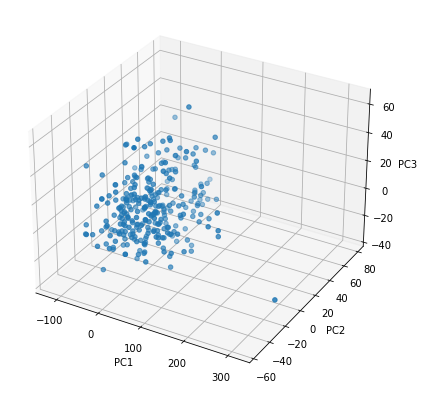

In [18]:
# PC1 vs PC2 vs PC3
fig = plt.figure( figsize = ( 7,7 ) )
axes = fig.add_subplot( projection = '3d' )
axes.scatter( x_proj.iloc[:,0], x_proj.iloc[:,1], x_proj.iloc[:,2] )
axes.set_xlabel("PC1")
axes.set_ylabel("PC2")
axes.set_zlabel("PC3")
plt.show()

In [19]:
def pca_map(X, figsize=(10,10), sup="", print_values= False):
    #PCA
    columns=X.columns.values
    pca=PCA(n_components=2)
    pca.fit(X)
    pca_values=pca.components_
    
    #Plot
    plt.figure(figsize=figsize)
    plt.rcParams.update({'font.size': 14}) 
    
    #Plot circle
    x=np.linspace(start=-1,stop=1,num=500)
    y_positive=lambda x: np.sqrt(1-x**2) 
    y_negative=lambda x: -np.sqrt(1-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Plot smaller circle
    x=np.linspace(start=-0.5,stop=0.5,num=500)
    y_positive=lambda x: np.sqrt(0.5**2-x**2) 
    y_negative=lambda x: -np.sqrt(0.5**2-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Create broken lines
    x=np.linspace(start=-1,stop=1,num=30)
    plt.scatter(x,[0]*len(x), marker='_',color='maroon')
    plt.scatter([0]*len(x), x, marker='|',color='maroon')

    #Define color list
    colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
    if len(pca_values[0]) > 6:
        colors=colors*(int(len(pca_values[0])/6)+1)

    #Plot arrow
    add_string=""
    for i in range(len(pca_values[0])):
        xi=pca_values[0][i]
        yi=pca_values[1][i]
        plt.arrow(0,0, 
                  dx=xi, dy=yi, 
                  head_width=0.03, head_length=0.03, 
                  color=colors[i], length_includes_head=True)
        if print_values==True:
            add_string=f" ({round(xi,2)} {round(yi,2)})"
        plt.text(pca_values[0, i], 
                 pca_values[1, i] , 
                 s=columns[i] + add_string )

    plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
    plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
    plt.title('Variable factor map (PCA)')
    plt.suptitle(sup, y=1, fontsize=18)
    plt.show()

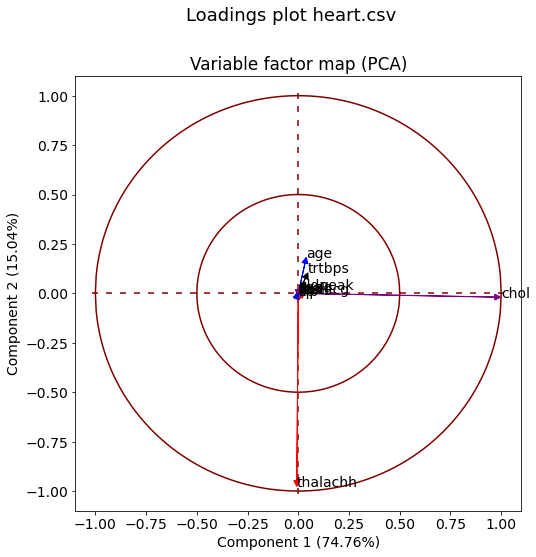

In [21]:
pca_map( x, figsize=(8,8), sup="Loadings plot heart.csv")

# le variabili che influenzano maggiormente le prime 2 componenti principali sono chol e thalacch 

# chol = cholestoral in mg/dl fetched via BMI sensor
# thalacch = maximum heart rate achieved
